In [146]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.express as px
import sketch
import numpy as np
import pandas as pd
from io import StringIO
import requests

import warnings

In [147]:
# Loading dataset
df = pd.read_csv("loan.csv")
df.head()

/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_14952/3261746476.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [148]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [149]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [150]:
df.id.count()

np.int64(39717)

In [151]:
nullV= df.isnull().sum()

In [152]:
nullV.sort_values(ascending=False).head(20)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
open_rv_24m                  39717
open_rv_12m                  39717
il_util                      39717
total_bal_il                 39717
mths_since_rcnt_il           39717
open_il_24m                  39717
dtype: int64

In [153]:
nullCol = np.array(nullV.loc[lambda x : x == 39717].index)

In [154]:
# Removed all Null Columns
df = df.drop(columns=nullCol)

In [155]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [156]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [157]:
#df1 = df.to_csv("loan2.csv")

pymnt_plan	url	desc
title	zip_code	addr_state	dti	delinq_2yrs	earliest_cr_line	inq_last_6mths	mths_since_last_delinq	mths_since_last_record	open_acc	pub_rec	revol_bal	revol_util	total_acc	initial_list_status	out_prncp	out_prncp_inv	total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int	total_rec_late_fee	recoveries	collection_recovery_fee	last_pymnt_d	last_pymnt_amnt	next_pymnt_d	last_credit_pull_d	collections_12_mths_ex_med	policy_code	application_type	acc_now_delinq	chargeoff_within_12_mths	delinq_amnt


In [158]:
nullCol2 = np.array(['pymnt_plan', 'url', 'desc', 'title', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'])


In [159]:
df = df.drop(columns=nullCol2)

In [160]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


In [161]:
df.shape

(39717, 48)

In [162]:
df.to_csv("loan4.csv")

In [163]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
last_credit_pull_d                2
sub_grade                         0
recoveries                        0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
collection_recovery_fee           0
total_acc                         0
int_rate                          0
last_pymnt_amnt                   0
term                              0
funded_amnt_inv                   0
funded_amnt                       0
loan_amnt                   

In [164]:
df2 = pd.read_csv("loan4.csv")

/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_14952/2028598937.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("loan4.csv")


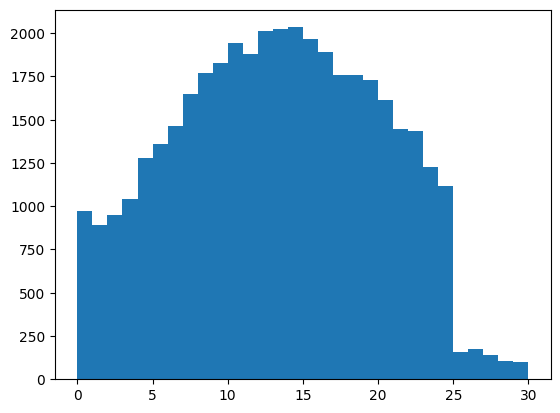

In [165]:
plt.hist(df2.dti, bins=30)
plt.show()

we can see in the above graph that there is a steep dropoff at 25 dti in the number of loans given, this means that the LendingClub does not give loans as freely to people who have DTI over 25 as under 25

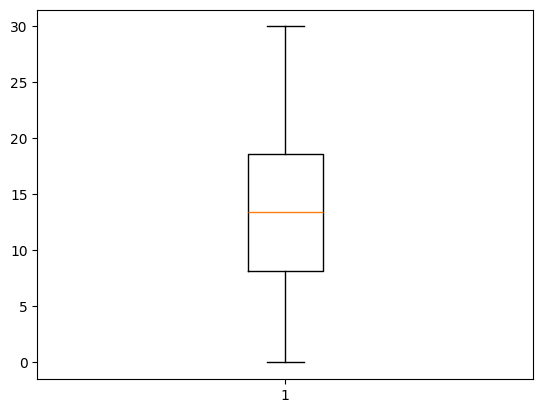

In [166]:
plt.boxplot(df2.dti)
plt.show()

In [167]:
ho_vals = df2.home_ownership.value_counts().values

In [168]:
ho_keys = np.array(df2.home_ownership.value_counts().index)

<BarContainer object of 5 artists>

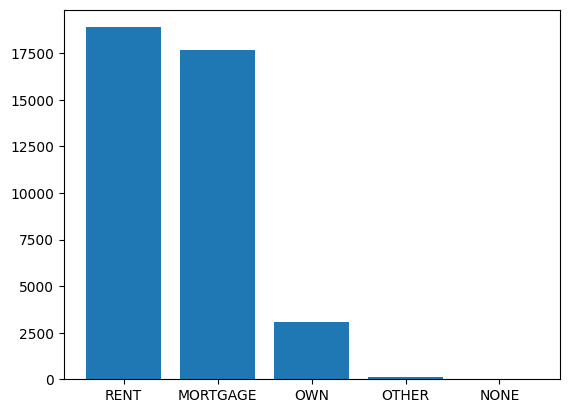

In [169]:
plt.bar(ho_keys, ho_vals)

<BarContainer object of 7 artists>

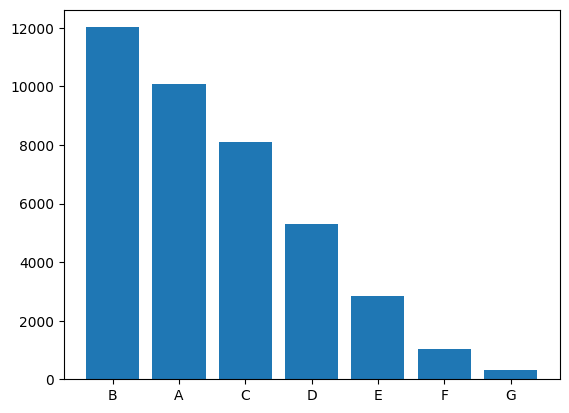

In [170]:
plt.bar(np.array(df2.grade.value_counts().index), df2.grade.value_counts().values)

In [171]:
df2.annual_inc.value_counts().loc[lambda x: x == 1]

annual_inc
24864.00     1
63834.24     1
67680.00     1
24756.00     1
182000.00    1
            ..
56820.00     1
45314.00     1
53913.00     1
62880.00     1
27376.00     1
Name: count, Length: 3963, dtype: int64

In [172]:
df3 = df2[df2.annual_inc < 4000.0]

In [173]:
df3.annual_inc.value_counts().loc[lambda x: x == 1]

Series([], Name: count, dtype: int64)

In [174]:
third_quartile = np.percentile(df2.annual_inc, 75)

In [175]:
first_quartile = np.percentile(df2.annual_inc, 25)

In [176]:
iqr = third_quartile - first_quartile # IQR

In [177]:
# upper fence
upper_fence = third_quartile + (1.5 * iqr)

In [178]:
lower_fence = first_quartile - (1.5 * iqr)

In [179]:
df3 = df2[df2.annual_inc < upper_fence]

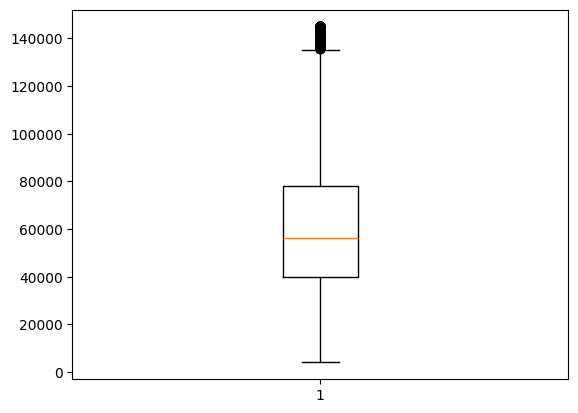

In [180]:
b = plt.boxplot(df3.annual_inc)
plt.show()

In [181]:
[i.get_ydata()[1] for i in b['whiskers']]

[np.float64(4000.0), np.float64(135000.0)]

(array([ 854., 4441., 7817., 8402., 5408., 4357., 2990., 1522., 1409.,
         674.]),
 array([  4000. ,  18100.8,  32201.6,  46302.4,  60403.2,  74504. ,
         88604.8, 102705.6, 116806.4, 130907.2, 145008. ]),
 <BarContainer object of 10 artists>)

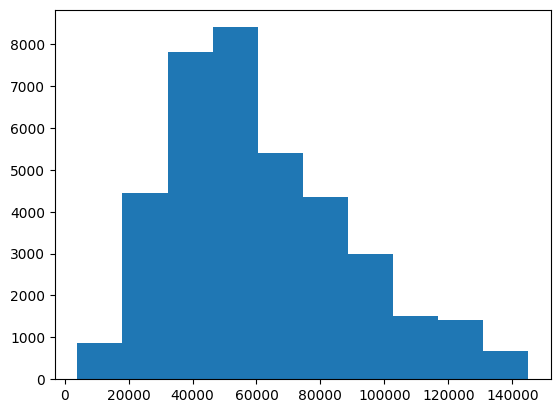

In [182]:
plt.hist(df3.annual_inc, bins=10)

In [183]:
df3.int_rate = df3.int_rate.apply(lambda x: float(x.replace('%', '')))

/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_14952/4017597253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.int_rate = df3.int_rate.apply(lambda x: float(x.replace('%', '')))


In [184]:
df3.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39716    13.75
Name: int_rate, Length: 37874, dtype: float64

In [185]:
df2.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [186]:
df4 = df2[df2.loan_status == 'Charged Off']

In [187]:
df2.groupby('loan_status')['annual_inc'].max()

loan_status
Charged Off    1250000.0
Current         650000.0
Fully Paid     6000000.0
Name: annual_inc, dtype: float64

In [188]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [189]:
df2.int_rate = df2.int_rate.apply(lambda x: float(x.replace('%', '')))

In [190]:
df2.groupby('loan_status')['int_rate'].max()

loan_status
Charged Off    24.40
Current        24.59
Fully Paid     24.11
Name: int_rate, dtype: float64

In [191]:
df2.groupby('loan_status')['annual_inc'].median()

loan_status
Charged Off    53000.0
Current        65000.0
Fully Paid     60000.0
Name: annual_inc, dtype: float64

In [192]:
df2.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    62427.298034
Current        75430.665105
Fully Paid     69862.503328
Name: annual_inc, dtype: float64

In [193]:
df2.groupby('loan_status')['int_rate'].median()

loan_status
Charged Off    13.61
Current        14.65
Fully Paid     11.49
Name: int_rate, dtype: float64

In [194]:
df2.groupby('loan_status')['int_rate'].mean()

loan_status
Charged Off    13.820432
Current        15.031465
Fully Paid     11.609761
Name: int_rate, dtype: float64

In [195]:
df2.groupby('loan_status')['dti'].median()

loan_status
Charged Off    14.29
Current        15.05
Fully Paid     13.20
Name: dti, dtype: float64

In [272]:
df2.groupby('loan_status')['int_rate'].max()

loan_status
Charged Off    24.40
Current        24.59
Fully Paid     24.11
Name: int_rate, dtype: float64

In [197]:
df2.mths_since_last_delinq.value_counts()

mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

In [198]:
df2.groupby('loan_status')['mths_since_last_delinq'].max()

loan_status
Charged Off    107.0
Current        103.0
Fully Paid     120.0
Name: mths_since_last_delinq, dtype: float64

In [199]:
df2.groupby('loan_status')['mths_since_last_delinq'].median()

loan_status
Charged Off    34.0
Current        34.0
Fully Paid     34.0
Name: mths_since_last_delinq, dtype: float64

In [200]:
df2.groupby('loan_status')['mths_since_last_delinq'].mean()

loan_status
Charged Off    36.157330
Current        36.595041
Fully Paid     35.831483
Name: mths_since_last_delinq, dtype: float64

In [202]:
df2.delinq_2yrs.value_counts()

delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [254]:
df2.groupby('loan_status')['delinq_2yrs'].count()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: delinq_2yrs, dtype: int64

In [270]:
df2.groupby('loan_status')['delinq_2yrs'].agg(pd.Series.mode)

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: delinq_2yrs, dtype: int64

In [214]:
df2.revol_util = df2.revol_util.apply(lambda r: float(r.replace('%', '')) if type(r) != float else r)

In [216]:
df2.revol_util.value_counts()

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [253]:
df2.groupby('loan_status')['revol_util'].count()

loan_status
Charged Off     5611
Current         1140
Fully Paid     32916
Name: revol_util, dtype: int64

In [219]:
df2.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [230]:
emp_dict = {
 '10+ years': 11,
 '< 1 year': 0,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '1 year': 1,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
  np.nan: -1
}

df2['sanitized_emp_length'] = df2.emp_length.map(lambda x: emp_dict[x])

In [231]:
df2.sanitized_emp_length

0        11
1         0
2        11
3        11
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: int64

In [224]:
df2.sanitized_emp_length.value_counts()

emp_length
 11    8879
 0     4583
 2     4388
 3     4095
 4     3436
 5     3282
 1     3240
 6     2229
 7     1773
 8     1479
 9     1258
-1     1075
Name: count, dtype: int64

In [232]:
df2.groupby('loan_status')['sanitized_emp_length'].median()

loan_status
Charged Off    4.0
Current        6.0
Fully Paid     4.0
Name: sanitized_emp_length, dtype: float64

In [269]:
df2.groupby('loan_status')['sanitized_emp_length'].agg(pd.Series.mode)

loan_status
Charged Off    11
Current        11
Fully Paid     11
Name: sanitized_emp_length, dtype: int64

In [239]:
bar_data = df2[df2['loan_status'] == 'Charged Off']['revol_util'].value_counts().sort_index()

<BarContainer object of 999 artists>

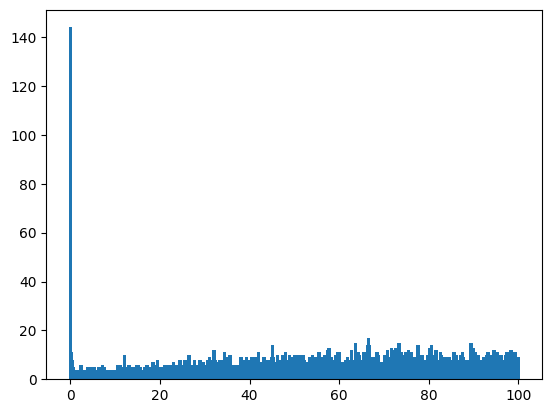

In [237]:
plt.bar(np.array(bar_data.index), bar_data.values)

In [244]:
bar_data2 = df2[df2['loan_status'] == 'Fully Paid']['revol_util'].value_counts().sort_index()

<BarContainer object of 1077 artists>

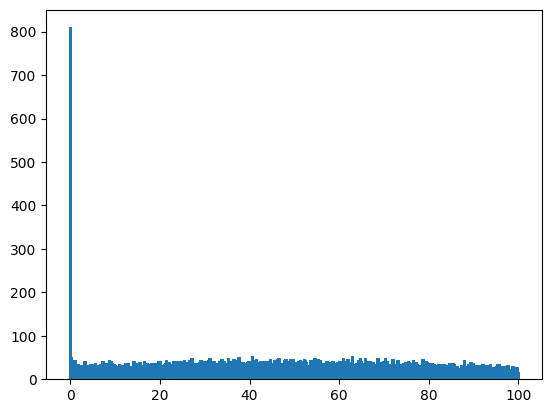

In [241]:
plt.bar(np.array(bar_data2.index), bar_data2.values)

In [243]:
bar_data3 = df2[df2['loan_status'] == 'Current']['revol_util'].value_counts().sort_index()

<BarContainer object of 657 artists>

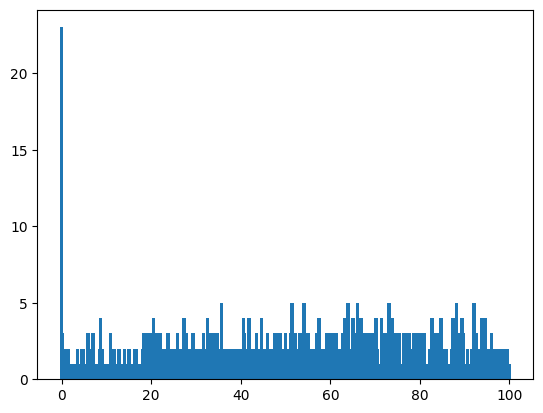

In [245]:
plt.bar(np.array(bar_data3.index), bar_data3.values)

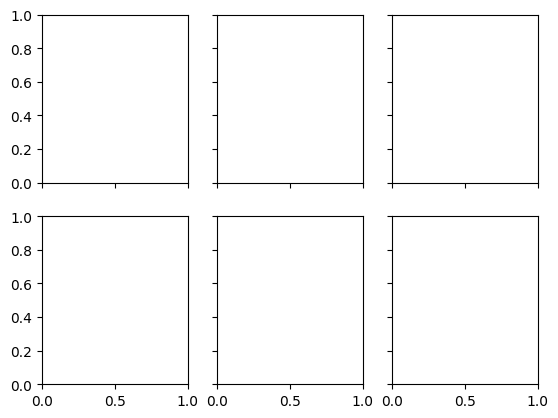

In [246]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharex=True, sharey=True)
ax[0][0].

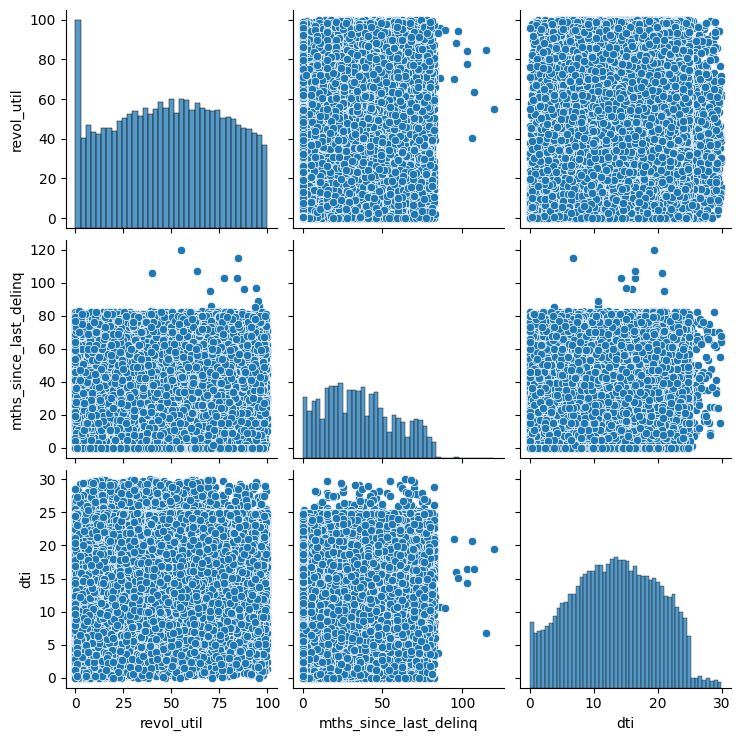

In [247]:
sb.pairplot(df2[['loan_status', 'revol_util', 'mths_since_last_delinq', 'dti']])

In [248]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [251]:
loan_status_dict = {
  'Charged Off': 0,
  'Current': 1,
  'Fully Paid': 2
}

df2['numeric_loan_status'] = df2.loan_status.map(lambda x: loan_status_dict[x])

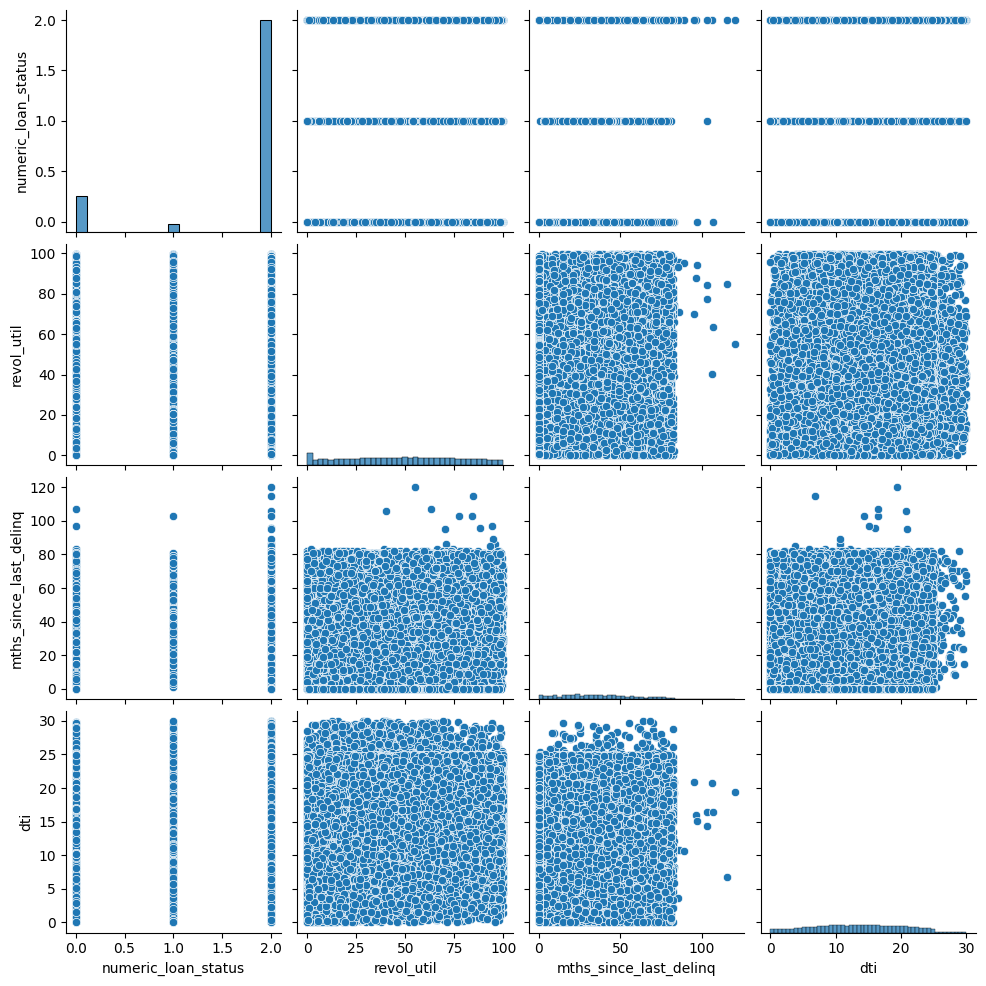

In [252]:
sb.pairplot(df2[['numeric_loan_status', 'revol_util', 'mths_since_last_delinq', 'dti']])

In [255]:
df2.open_acc.value_counts()

open_acc
7     4018
6     3946
8     3936
9     3718
10    3223
5     3183
11    2746
4     2343
12    2273
13    1911
3     1493
14    1487
15    1177
16     940
17     741
2      605
18     533
19     396
20     289
21     244
22     143
23      97
24      81
25      55
26      34
28      25
27      22
30      15
29      13
31       7
34       5
32       4
35       4
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [256]:
df2.groupby('loan_status')['open_acc'].max()

loan_status
Charged Off    38
Current        32
Fully Paid     44
Name: open_acc, dtype: int64

In [257]:
df2.groupby('loan_status')['open_acc'].median()

loan_status
Charged Off    8.0
Current        9.0
Fully Paid     9.0
Name: open_acc, dtype: float64

In [268]:
df2.groupby('loan_status')['pub_rec'].agg(pd.Series.mode)

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: pub_rec, dtype: int64

In [267]:
df2.groupby('loan_status')['inq_last_6mths'].agg(pd.Series.mode)

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: inq_last_6mths, dtype: int64

In [266]:
df2.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [275]:
df2.groupby('loan_status')['loan_amnt'].median()

loan_status
Charged Off    10000.0
Current        15825.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64

In [276]:
df2.groupby('loan_status')['loan_amnt'].agg(pd.Series.mode)

loan_status
Charged Off    10000
Current        20000
Fully Paid     10000
Name: loan_amnt, dtype: int64

In [277]:
df2.groupby('loan_status')['annual_inc'].agg(pd.Series.mode)

loan_status
Charged Off    60000.0
Current        60000.0
Fully Paid     60000.0
Name: annual_inc, dtype: float64

In [278]:
df2.groupby('loan_status')['annual_inc'].median()

loan_status
Charged Off    53000.0
Current        65000.0
Fully Paid     60000.0
Name: annual_inc, dtype: float64

In [279]:
df2.groupby('loan_status')['annual_inc'].max()

loan_status
Charged Off    1250000.0
Current         650000.0
Fully Paid     6000000.0
Name: annual_inc, dtype: float64

In [281]:
df2.purpose.value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

<Axes: xlabel='purpose'>

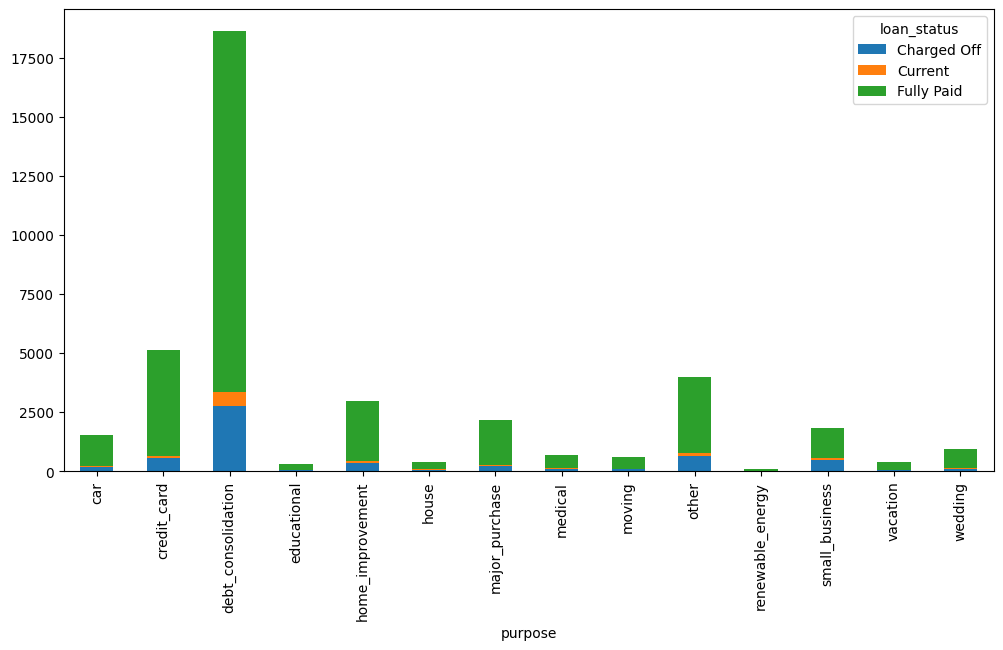

In [283]:
grouped_counts = df2.groupby('loan_status')['purpose'].value_counts()
grouped_df = grouped_counts.unstack().fillna(0)
grouped_df.T.plot(kind='bar', figsize=(12,6), stacked=True)

In [312]:
grouped_counts = df2.groupby('loan_status')['purpose'].value_counts()
grouped_df = grouped_counts.unstack().fillna(0)
grouped_df = grouped_df.div(grouped_df.sum(axis=0), axis=1)
grouped_df.head()

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,0.103292,0.105653,0.148436,0.172308,0.116599,0.154856,0.101509,0.152958,0.157804,0.158527,0.184466,0.259847,0.139108,0.101373
Current,0.032279,0.020078,0.031436,0.000000,0.033938,0.036745,0.016918,0.017316,0.012007,0.032056,0.009709,0.040481,0.015748,0.022175
Fully Paid,0.864429,0.874269,0.820128,0.827692,0.849462,0.808399,0.881573,0.829726,0.830189,0.809416,0.805825,0.699672,0.845144,0.876452


In [313]:
grouped_df.sum(axis=0)

purpose
car                   1.0
credit_card           1.0
debt_consolidation    1.0
educational           1.0
home_improvement      1.0
house                 1.0
major_purchase        1.0
medical               1.0
moving                1.0
other                 1.0
renewable_energy      1.0
small_business        1.0
vacation              1.0
wedding               1.0
dtype: float64

In [285]:
def plot_stacked_chart(grouper, column):
  grouped_counts = df2.groupby(grouper)[column].value_counts()
  grouped_df = grouped_counts.unstack().fillna(0)
  grouped_df.T.plot(kind='bar', figsize=(12,6), stacked=True)
  plt.show()

In [314]:
def plot_normalized_stacked_chart(grouper, column):
  grouped_counts = df2.groupby(grouper)[column].value_counts()
  grouped_df = grouped_counts.unstack().fillna(0)
  grouped_df = grouped_df.div(grouped_df.sum(axis=0), axis=1)

  grouped_df.T.plot(kind='bar', figsize=(12,6), stacked=True)
  plt.show()

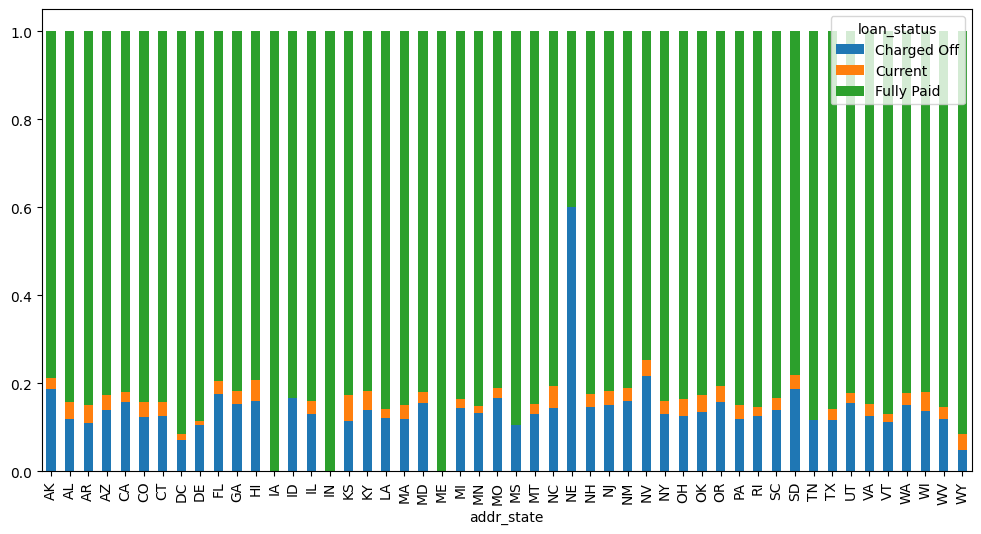

In [315]:
plot_normalized_stacked_chart('loan_status', 'addr_state')

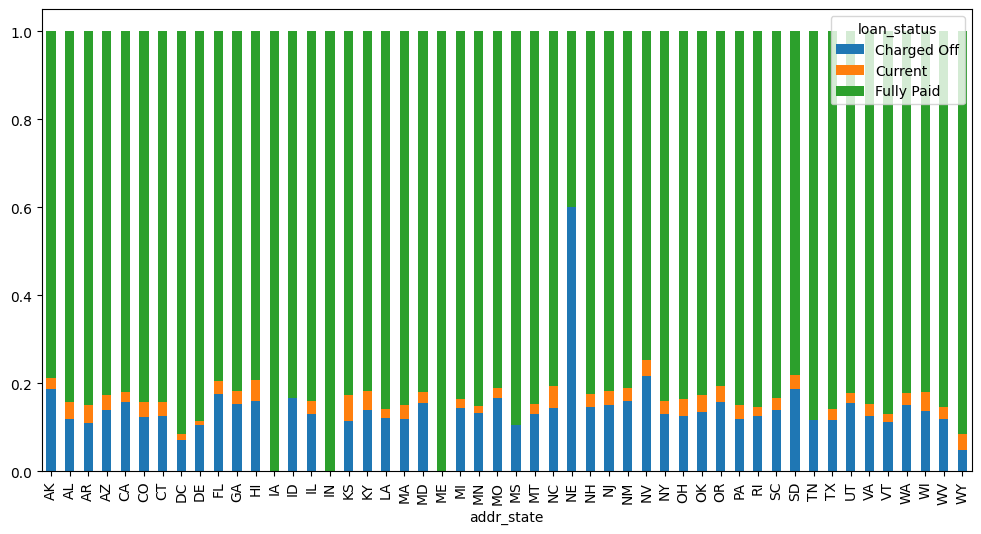

In [316]:
plot_normalized_stacked_chart('loan_status', 'addr_state')

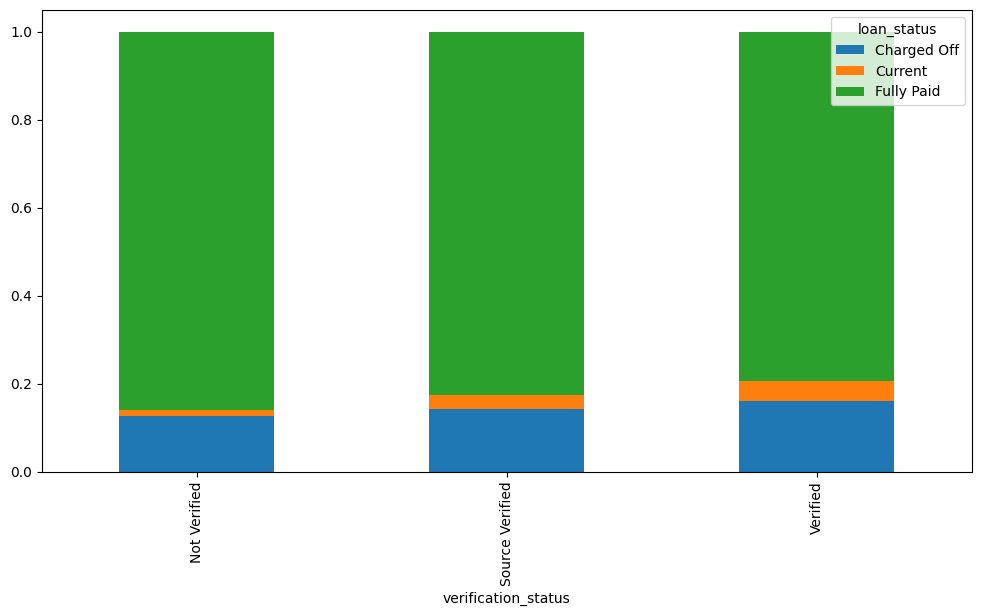

In [317]:
plot_normalized_stacked_chart('loan_status', 'verification_status')

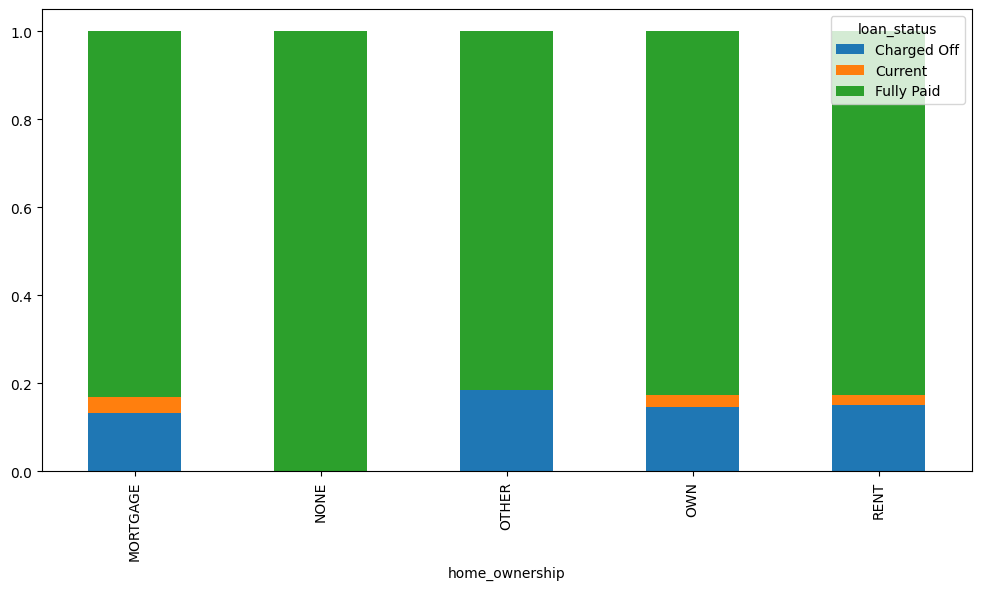

In [318]:
plot_normalized_stacked_chart('loan_status', 'home_ownership')

In [299]:
# plot_stacked_chart('loan_status', 'installment')
df2.groupby('loan_status')['installment'].value_counts()

loan_status  installment
Charged Off  276.06         9
             296.75         8
             324.42         8
             203.59         7
             320.95         7
                           ..
Fully Paid   1265.16        1
             1272.20        1
             1283.50        1
             1288.10        1
             1295.21        1
Name: count, Length: 18507, dtype: int64

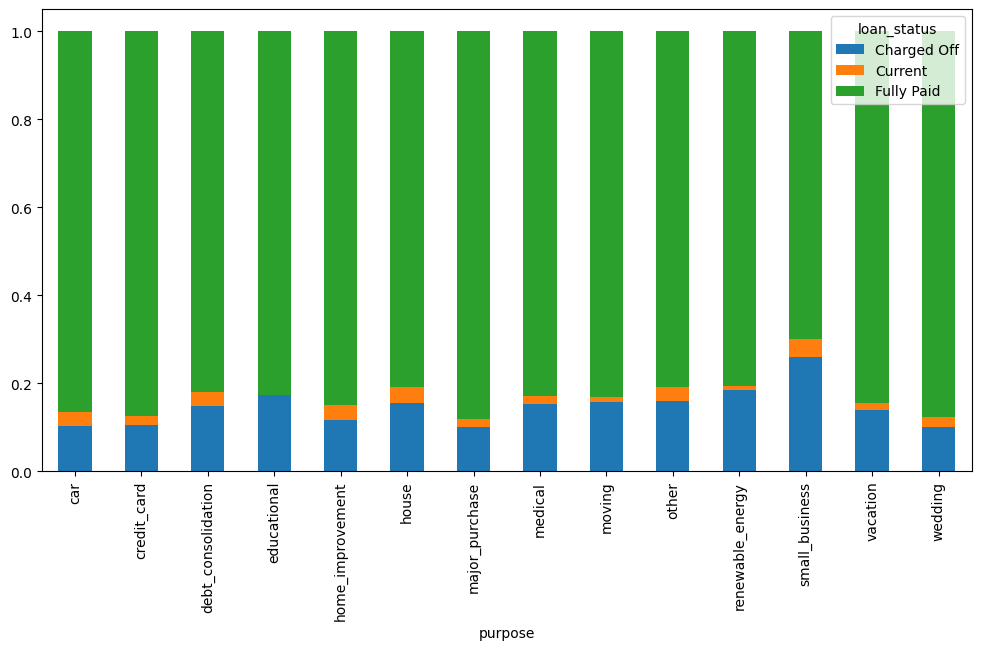

In [319]:
plot_normalized_stacked_chart('loan_status', 'purpose')